In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [34]:
National_Car_Ownership = pd.read_excel("../00_Data/Original_data/National_Car_Ownership.xlsx")
National_Car_Ownership.head()

,Date,number of car ownership
0,2011.01,18038828
1,2011.02,18074004
2,2011.03,18129127
3,2011.04,18178380
4,2011.05,18217793


In [35]:
National_Car_Ownership.shape

(156, 2)

In [36]:
National_Car_Ownership.columns

Index(['Date', 'number of car ownership'], dtype='object')

In [37]:
National_Car_Ownership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     156 non-null    float64
 1   number of car ownership  156 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.6 KB


In [38]:
National_Car_Ownership.describe()

,Date,number of car ownership
count,156.000000,1.560000e+02
mean,2017.065000,2.202107e+07
std,3.753868,2.478405e+06
min,2011.010000,1.803883e+07
25%,2014.037500,1.964637e+07
50%,2017.065000,2.222158e+07
75%,2020.092500,2.421378e+07
max,2023.120000,2.594920e+07


In [39]:
National_Car_Ownership.dtypes

Date                       float64
number of car ownership      int64
dtype: object

In [40]:
National_Car_Ownership

,Date,number of car ownership
0,2011.01,18038828
1,2011.02,18074004
2,2011.03,18129127
3,2011.04,18178380
4,2011.05,18217793
...,...,...
151,2023.08,25807871
152,2023.09,25845648
153,2023.10,25870152
154,2023.11,25917976


In [41]:
from datetime import datetime, timedelta
import numpy as np
from scipy.interpolate import interp1d
import math

# Given monthly data
National_Car_Ownership['Date'] = National_Car_Ownership['Date'].astype(str)

monthly_data = National_Car_Ownership.values

# Convert year-month formatted strings to date objects
dates = [datetime.strptime(year_month, "%Y.%m") for year_month, _ in monthly_data]

# Values of monthly data
values = [value for _, value in monthly_data]

# Sort date and value data by date
sorted_indices = np.argsort(dates)
sorted_dates = [dates[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Create an interpolation function
f = interp1d([date.timestamp() for date in sorted_dates], sorted_values, kind='linear')

# Generate interpolated daily data
start_date = sorted_dates[0]
end_date = sorted_dates[-1]

daily_dates = []
current_date = start_date
while current_date <= end_date:
    daily_dates.append(current_date)
    current_date += timedelta(days=1)

daily_values = [f(date.timestamp()) for date in daily_dates]

# Print the result
daily_data = list(zip(daily_dates, daily_values))

interpolation_function_National_Car_Ownership = pd.DataFrame(daily_data,columns=National_Car_Ownership.columns)

interpolation_function_National_Car_Ownership['number of car ownership'] = interpolation_function_National_Car_Ownership['number of car ownership'].astype(int)

interpolation_function_National_Car_Ownership


,Date,number of car ownership
0,2011-01-01,18409608
1,2011-01-02,18398782
2,2011-01-03,18387956
3,2011-01-04,18377130
4,2011-01-05,18366304
...,...,...
4713,2023-11-27,25945037
4714,2023-11-28,25946078
4715,2023-11-29,25947119
4716,2023-11-30,25948160


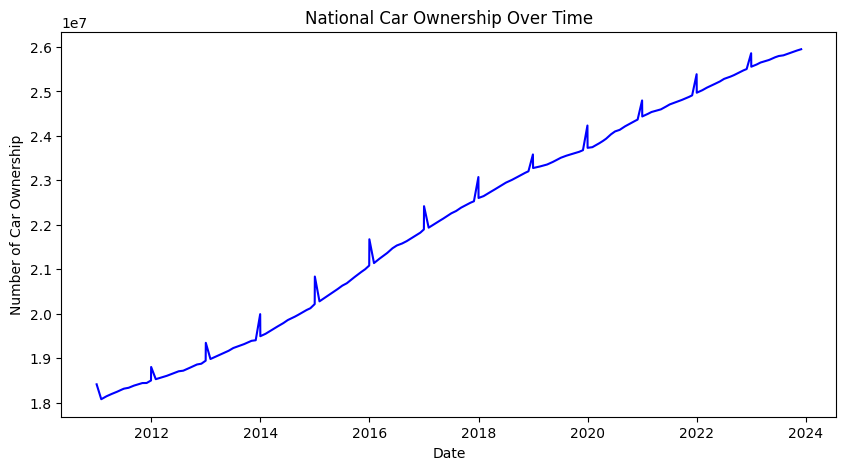

In [42]:
# Visulaization

plt.figure(figsize=(10, 5))
plt.plot(interpolation_function_National_Car_Ownership['Date'], interpolation_function_National_Car_Ownership['number of car ownership'], color='blue')
plt.title('National Car Ownership Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Car Ownership')
plt.show()


In [43]:
# Create excel file.

interpolation_function_National_Car_Ownership.to_excel("../00_Data/Transformed_data/interpolation_function_National_Car_Ownership.xlsx")